In [41]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import gmaps

In [42]:
#pulling csv file
#reading csv file
nyc_df = pd.read_csv('Airbnb Data/AB_NYC_2019.csv')

#find the variable data types
nyc_df = nyc_df.dropna() #drop any null values
nyc_df.head()




,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


# First Chart (Change after creation)

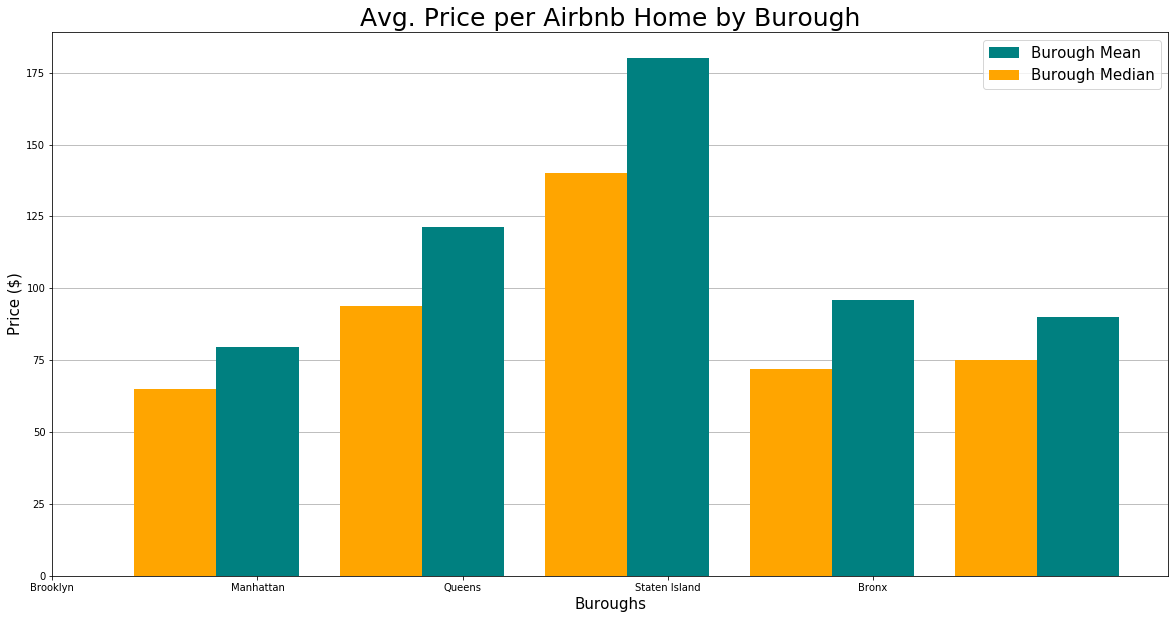

In [72]:
#plot average price in neighborhoods
n_type = nyc_df.groupby(['neighbourhood_group'])
neighbor_mean = pd.DataFrame(n_type['price'].mean())
n_name = nyc_df['neighbourhood_group'].unique()
neighbor_mean = neighbor_mean['price']
neighbor_med = pd.DataFrame(n_type['price'].median())
neighbor_med = neighbor_med['price']
x = np.arange(len(neighbor_mean))

plt.figure(figsize=(20,10))

plt.bar(x+1,neighbor_mean,width=.4,label='Burough Mean',color=('teal'),zorder=3)
plt.bar(x+.6,neighbor_med,width=.4,label='Burough Median',color=('orange'),zorder=3)
#neighbor_mean.plot(kind="bar",figsize=(10,6),color=('orange','green','blue','teal'),align='center',
                  #legend=None,zorder=3)

#format chart
plt.title('Avg. Price per Airbnb Home by Burough',size=25)
plt.xlabel('Buroughs', size=15)
plt.ylabel('Price ($)', size=15)
plt.grid(axis='y',zorder=0)
plt.legend(prop = {'size':15})
plt.xticks(x,n_name,rotation='horizontal',ha='center')

#save as .png
plt.savefig('Airbnb Data/avg_per_burough.png')
plt.show()

#for x, y in range(len(neighbourhood)):

#print(neighbor_mean)

Text(0.5, 0.98, '')

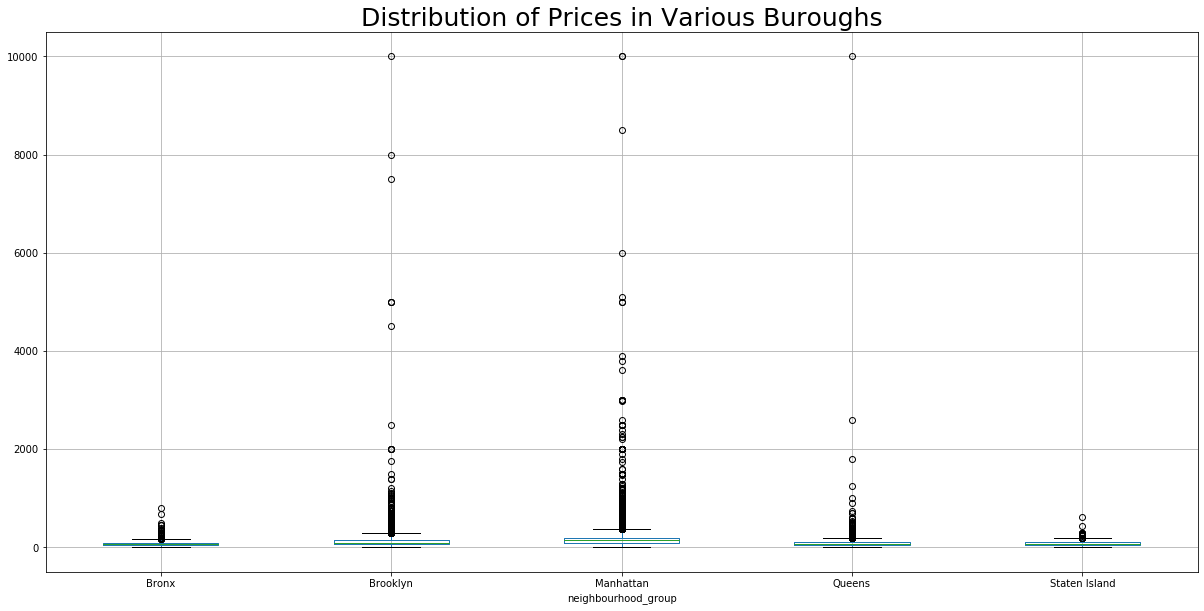

In [44]:
#Distribution of Buroughs
bur_group = nyc_df[['neighbourhood_group','price']]

bur_group.boxplot('price',by='neighbourhood_group',figsize=(20,10))
plt.title('Distribution of Prices in Various Buroughs',size=25)
plt.suptitle('')


In [45]:
#To accept or reject the Null Hypothesis
Bronx_hood =  nyc_df[nyc_df["neighbourhood_group"] == "Bronx"]["price"]
Brooklyn_hood = nyc_df[nyc_df["neighbourhood_group"] == "Brooklyn"]["price"]
Manhaton_hood =nyc_df[nyc_df["neighbourhood_group"] == "Manhattan"]["price"]
Queens_hood= nyc_df[nyc_df["neighbourhood_group"] == "Queens"]["price"]
Staten_hood= nyc_df[nyc_df["neighbourhood_group"] == "Staten Island"]["price"]

#find the critical value and p-value
stats.f_oneway(Bronx_hood, Brooklyn_hood, Manhaton_hood, Queens_hood, Staten_hood)

F_onewayResult(statistic=299.1170643325002, pvalue=7.558354126272287e-254)

In [46]:
#Find calculations for charts 
bur_group = nyc_df[['neighbourhood_group','price']]

manhattan = pd.DataFrame(nyc_df.loc[nyc_df['neighbourhood_group']=='Manhattan',:])

m_group = manhattan.groupby(['neighbourhood'])

nmean = pd.DataFrame(m_group['price'].mean()).reset_index()
nmean_p = nmean['price']
nmedian = pd.DataFrame(m_group['price'].median()).reset_index()
nmedian_p = nmedian['price']


(0, 500)

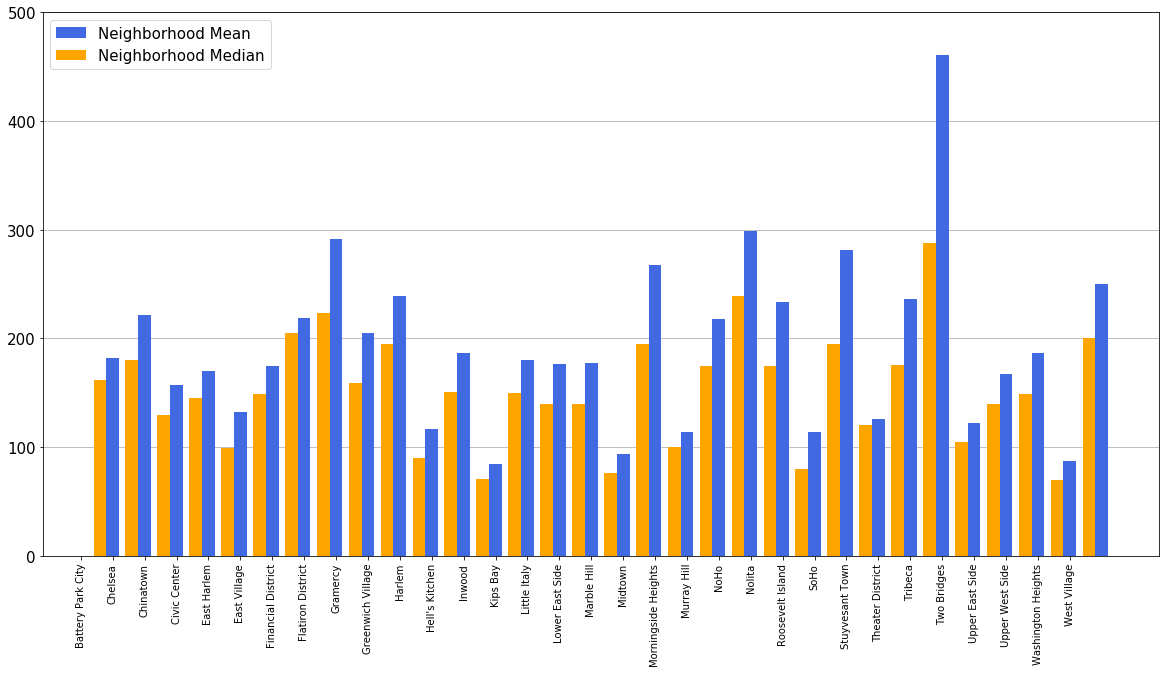

In [73]:
#Bar chart to portray the average of prices in each neighborhood in Manhattan
xpos= np.arange(len(nmean))


#Plot the chart
plt.figure(figsize=(20,10))
plt.bar(xpos+1,nmean_p,label='Neighborhood Mean',width=0.4,color='royalblue',zorder=3);
plt.bar(xpos+0.6,nmedian_p,label='Neighborhood Median',width=0.4,color='orange',zorder=3);

#Chart formatting
plt.legend(loc='best',prop = {'size':15})
plt.grid(axis='y')
plt.xticks(xpos,nmean['neighbourhood'],rotation=90,ha='center')
plt.yticks(size=15)
plt.ylim(0,500)
#print(round(nmean,2))
#nmean.plot(kind='bar', figsize=(20,8),align='center')
#nmedian.plot(kind='bar', figsize=(20,8),align='center')

#plt.xticks(xpos,nmean)





                      price
room_type                  
Entire home/apt  196.315929
Private room      83.985272
Shared room       63.213948


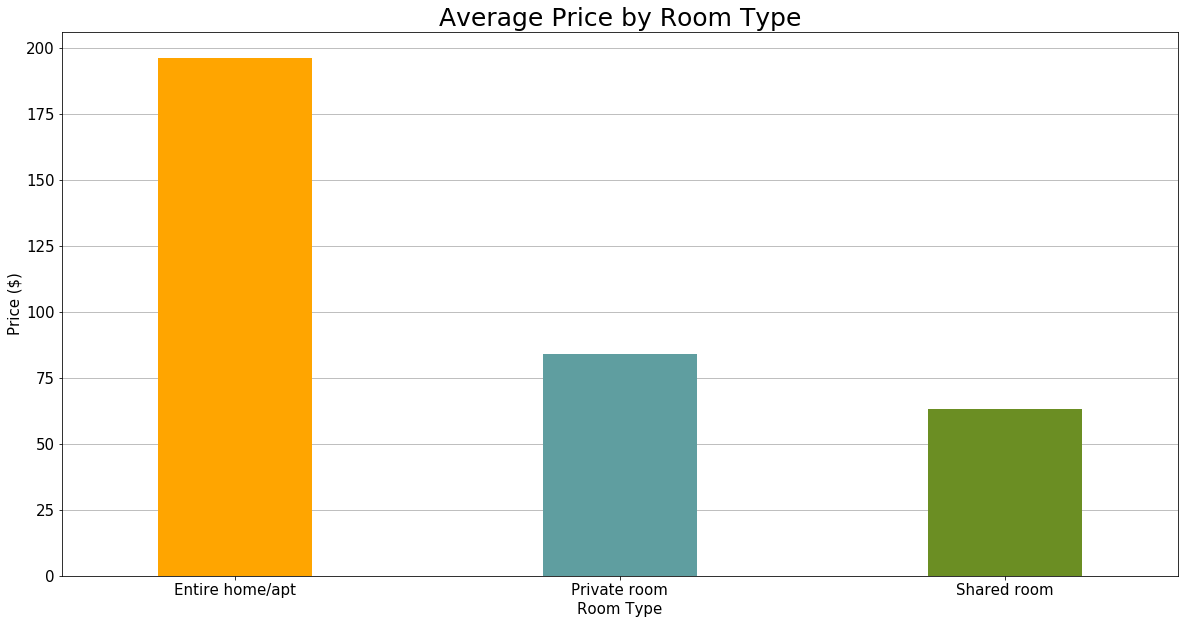

In [66]:
#Groupby Room Types
rm_type = nyc_df.groupby(['room_type'])
room_mean = pd.DataFrame(rm_type['price'].mean())
print(room_mean)

#plot bar chart
room_mean.plot(kind="bar",figsize=(20,10), color=('orange','cadetblue','olivedrab'),align='center',
              legend=None,zorder=3,width=.4)

#Chart formatting
plt.title('Average Price by Room Type',size = 25)
plt.xlabel('Room Type',size=15)
plt.ylabel('Price ($)', size=15)
plt.yticks(size=15)
plt.xticks(rotation='horizontal',size=15)
plt.grid(axis='y',zorder=0)
#Save as .png
plt.savefig('Airbnb Data/avg_price_roomtype.png')

plt.show()


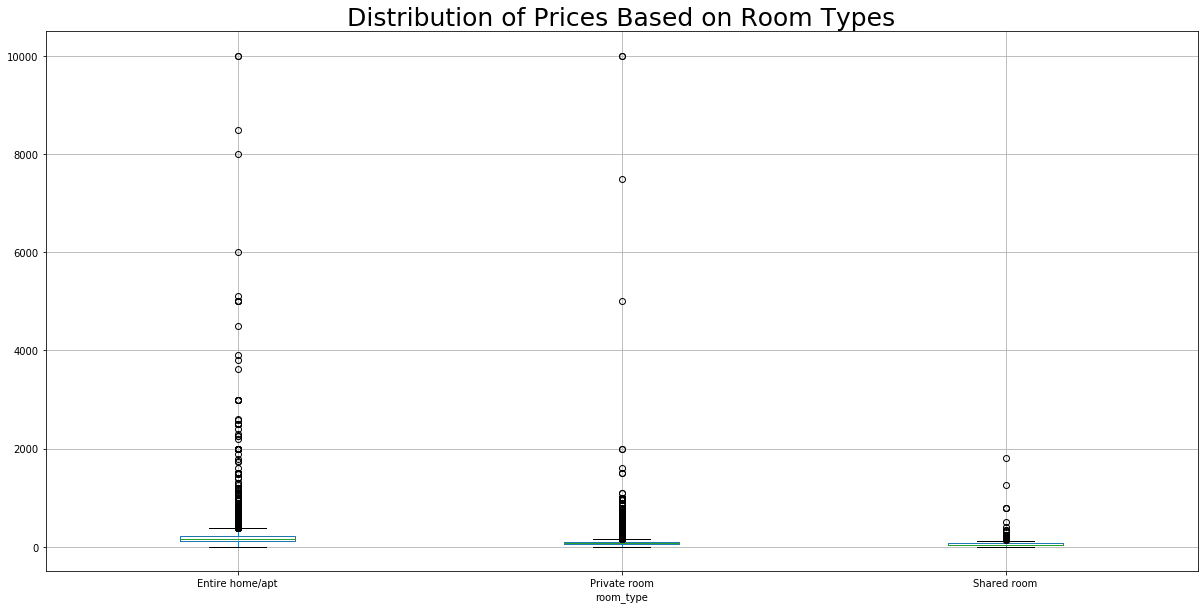

In [49]:
bur_group = nyc_df[['room_type','price']]
#Create Boxplot for room_types
bur_group.boxplot('price',by='room_type',figsize=(20,10))
plt.title('Distribution of Prices Based on Room Types',size=25)
plt.suptitle('')

#save as .png
plt.savefig('Airbnb Data/dis_roomtypes.png')

In [50]:
#To accept or reject the Null Hypothesis
house_price = nyc_df[nyc_df["room_type"] == "Entire home/apt"]["price"]
private_price = nyc_df[nyc_df["room_type"] == "Private room"]["price"]
shared_price = nyc_df[nyc_df["room_type"] == "Shared room"]["price"]

#find the critical value and p-value
stats.f_oneway(house_price, private_price, shared_price)

F_onewayResult(statistic=1750.3004939558498, pvalue=0.0)

In [51]:
#Create bins for pricing groups
home_type = ["Private room", "Entire home/apt", "Shared room"]
airbnb_price = [0,69,106,175]
#define
rm_type = pd.read_csv('Airbnb Data/AB_NYC_2019.csv')

rm_type.head(2)

rm_type['price'] = pd.qcut(rm_type.price,4)

In [52]:
rm_type

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,"(106.0, 175.0]",1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,"(175.0, 10000.0]",1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,"(106.0, 175.0]",3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,"(69.0, 106.0]",1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,"(69.0, 106.0]",10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,"(175.0, 10000.0]",3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,"(-0.001, 69.0]",45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,"(69.0, 106.0]",2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,"(69.0, 106.0]",2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,"(106.0, 175.0]",1,160,2019-06-09,1.33,4,188
